In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_results(results_dir):
    result_dfs = []
    for p in results_dir.glob("*"):
        key = '_'.join(p.name.split("_")[2:])
        df = pd.read_pickle(p / "history.pkl")
        ds_name, privacy_level = key.split("_")[:2]
        is_iid = key.endswith("_iid")
        df["dataset"] = [ds_name] * len(df)
        df["privacy_level"] = [privacy_level] * len(df)
        df["is_iid"] = [is_iid] * len(df)
        result_dfs.append(df)
    df = pd.concat(result_dfs)
    return df

In [4]:
def get_df_for_run(df, dataset, privacy_level, iid):
    return df[
        (df["dataset"] == dataset)
        & (df["privacy_level"] == privacy_level)
        & (df["is_iid"] == iid)
    ]

In [50]:
# all with budgets of 1.0, 2.0, 3.0
results_dir = Path("/home/ole/masterarbeit/flidp/results/2024-09-07_14:06:36-all")
# Cifar10, SVHN with budgets of 5.0, 10.0, 20.0
results_dir = Path("/home/ole/masterarbeit/flidp/results/2024-09-08_12:53:25-all")
# Cifar10, SVHN with budgets of 15.0, 25.0, 40.0
# results_dir = Path("/home/ole/masterarbeit/flidp/results/2024-09-11_11:54:55-all")
df = get_results(results_dir)

/tmp/ipykernel_1463344/2320095545.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(result_dfs)


In [51]:
len(df)

2525

In [52]:
def plot_by_privacy(df, dataset, iid, plot_col):
    pivoted = (
        df[
            (df["dataset"] == dataset) 
            & (df["is_iid"] == iid)
        ][[plot_col, "privacy_level", "round"]]
        .dropna()
        .pivot(index="round", columns="privacy_level", values=plot_col)
    )
    return pivoted.plot(ylabel=plot_col)

<Axes: xlabel='round', ylabel='accuracy'>

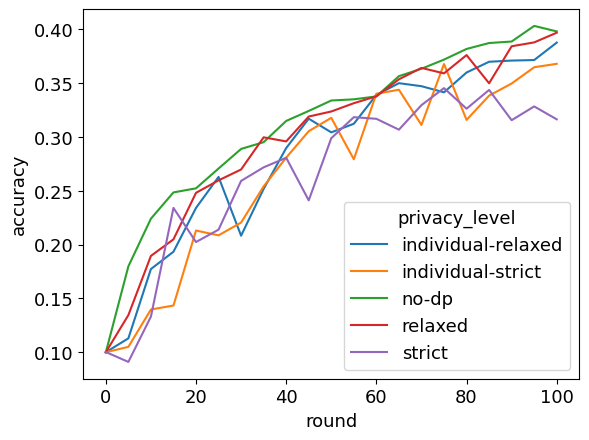

In [56]:
plt.rcParams.update({'font.size': 13})
plot_by_privacy(df, "cifar10", True, "accuracy")

In [9]:
df[(df["dataset"] == "emnist") & (df["privacy_level"] == "strict")]["sampled_clients"].mean()

49.95049504950495

In [10]:
df[(df["dataset"] == "cifar10") & (df["is_iid"])].groupby(by="privacy_level").agg({"accuracy": "max"})

,accuracy
privacy_level,
individual-relaxed,0.3877
individual-strict,0.3680
no-dp,0.4032
relaxed,0.3969
strict,0.3454


<Axes: xlabel='round', ylabel='sampled clients'>

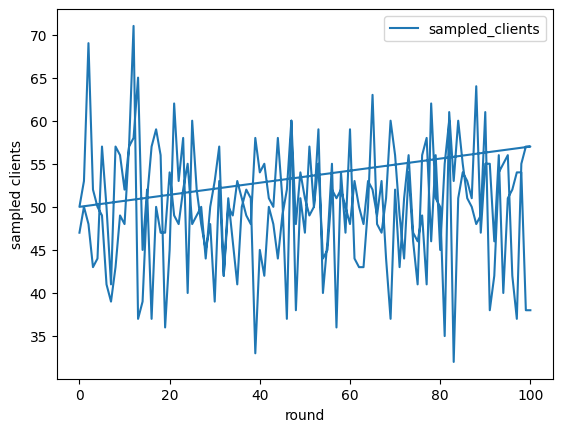

In [11]:
df[(df["dataset"] == "emnist") & (df["privacy_level"] == "strict")][["round", "sampled_clients"]].set_index("round").plot(ylabel="sampled clients")

In [12]:
df[(df["dataset"] == "emnist") & (df["privacy_level"] == "individual-relaxed")]

,round,round_time,sampled_clients,noise_multiplier,noise_multiplier_after_adaptive_clipping,update_clipping_norm,update_stddev,accuracy,loss,dataset,privacy_level,is_iid
0,0,None,53,0.917702,0.933561,0.100000,0.093356,0.099824,2.303640,emnist,individual-relaxed,False
1,1,None,46,0.917702,0.933561,0.110517,0.103174,NaN,NaN,emnist,individual-relaxed,False
2,2,None,54,0.917702,0.933561,0.121836,0.113741,NaN,NaN,emnist,individual-relaxed,False
3,3,None,58,0.917702,0.933561,0.134649,0.125703,NaN,NaN,emnist,individual-relaxed,False
4,4,None,44,0.917702,0.933561,0.148810,0.138924,NaN,NaN,emnist,individual-relaxed,False
...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,None,48,0.915871,0.931634,0.299993,0.279484,NaN,NaN,emnist,individual-relaxed,True
97,97,None,56,0.915871,0.931634,0.297227,0.276907,NaN,NaN,emnist,individual-relaxed,True
98,98,None,57,0.915871,0.931634,0.304013,0.283229,NaN,NaN,emnist,individual-relaxed,True
99,99,None,42,0.915871,0.931634,0.294459,0.274328,NaN,NaN,emnist,individual-relaxed,True


In [79]:
df[(df["dataset"] == "cifar10") & ~(df["is_iid"])].groupby('privacy_level').agg({'noise_multiplier': 'first'})

,noise_multiplier
privacy_level,
individual-relaxed,0.461182
individual-strict,0.494139
no-dp,NaN
relaxed,0.384468
strict,0.568019
